题目来源：[Some exercises-Scipy lecture notes](http://www.scipy-lectures.org/intro/numpy/exercises.html)

## 数组操作
**1.Form the 2-D array (without typing it in explicitly):**

```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
 ```
 
**and generate a new array containing its 2nd and 4th rows.**

In [1]:
import numpy as np
a = np.arange(1,16).reshape(3,5).T
a

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [2]:
b = a[1:4:2, :]
b

array([[ 2,  7, 12],
       [ 4,  9, 14]])

**2.Generate a 10 x 3 array of random numbers (in range [0,1]). For each row, pick the number closest to 0.5.**

**\*Use abs and argsort to find the column j closest for each row.**

**\*Use fancy indexing to extract the numbers. (Hint: a[i,j] – the array i must contain the row numbers corresponding to stuff in j.)**

In [3]:
import numpy as np
a = np.random.random_sample((10,3))
a

array([[ 0.50401919,  0.53286823,  0.5635683 ],
       [ 0.99231194,  0.86333392,  0.04357723],
       [ 0.45608448,  0.92779084,  0.51207225],
       [ 0.7690492 ,  0.40190295,  0.00848405],
       [ 0.53849656,  0.94451514,  0.77036006],
       [ 0.05292694,  0.8661317 ,  0.05104528],
       [ 0.43238107,  0.79917367,  0.25512145],
       [ 0.96159239,  0.56313458,  0.50483504],
       [ 0.34355931,  0.52437379,  0.93653181],
       [ 0.55768109,  0.60598157,  0.63620486]])

In [4]:
b = abs(a-0.5)
b

array([[ 0.00401919,  0.03286823,  0.0635683 ],
       [ 0.49231194,  0.36333392,  0.45642277],
       [ 0.04391552,  0.42779084,  0.01207225],
       [ 0.2690492 ,  0.09809705,  0.49151595],
       [ 0.03849656,  0.44451514,  0.27036006],
       [ 0.44707306,  0.3661317 ,  0.44895472],
       [ 0.06761893,  0.29917367,  0.24487855],
       [ 0.46159239,  0.06313458,  0.00483504],
       [ 0.15644069,  0.02437379,  0.43653181],
       [ 0.05768109,  0.10598157,  0.13620486]])

In [5]:
c = b.argmin(axis=1)
c

array([0, 1, 2, 1, 0, 1, 0, 2, 1, 0])

In [6]:
a[np.arange(10), c]  #fancy indexing

array([ 0.50401919,  0.86333392,  0.51207225,  0.40190295,  0.53849656,
        0.8661317 ,  0.43238107,  0.50483504,  0.52437379,  0.55768109])

## 数据分析

The data in [populations.txt](/populations.txt) describes the populations of hares and lynxes (and carrots) in northern Canada during 20 years:

Computes and print, based on the data in populations.txt:

1.The mean and std of the populations of each species for the years in the period.

2.Which year each species had the largest population.

3.Which species has the largest population for each year. (Hint: argsort & fancy indexing of np.array(['H', 'L', 'C']))

4.Which years any of the populations is above 50000. (Hint: comparisons and np.any)

5.The top 2 years for each species when they had the lowest populations. (Hint: argsort, fancy indexing)

6.Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation (see help(np.corrcoef)).

... all without for-loops.

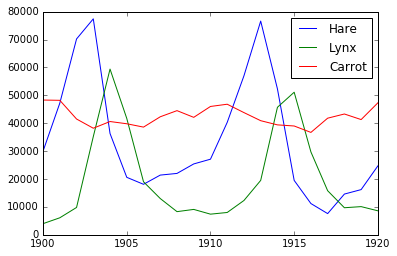

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T
plt.plot(year, hares, year, lynxes, year, carrots )
plt.legend(('Hare', 'Lynx', 'Carrot'), loc='upper right')

In [8]:
populations = data[:, 1:]
populations.mean(axis=0)

array([ 34080.95238095,  20166.66666667,  42400.        ])

In [9]:
populations.std(axis=0)

array([ 20897.90645809,  16254.59153691,   3322.50622558])

In [10]:
max_year = populations.argmax(axis=0)
year[max_year]

array([ 1903.,  1904.,  1900.])

In [11]:
max_species = populations.argmax(axis=1)
species = np.array(['hare', 'lynx', 'carrot'])
print (year)
print (species[max_species])

[ 1900.  1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.
  1910.  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.
  1920.]
['carrot' 'carrot' 'hare' 'hare' 'lynx' 'lynx' 'carrot' 'carrot' 'carrot'
 'carrot' 'carrot' 'carrot' 'hare' 'hare' 'hare' 'lynx' 'carrot' 'carrot'
 'carrot' 'carrot' 'carrot']


In [12]:
above_50000 = np.any(populations  > 50000, axis=1)
year[above_50000]

array([ 1902.,  1903.,  1904.,  1912.,  1913.,  1914.,  1915.])

In [13]:
top_2 = np.argsort(populations, axis=0)[:2]
year[top_2]

array([[ 1917.,  1900.,  1916.],
       [ 1916.,  1901.,  1903.]])

In [14]:
hare_grad = np.gradient(hares, 1.0) #gradient 梯度
np.corrcoef(hare_grad, lynxes)[0,1]

-0.91792484803153407

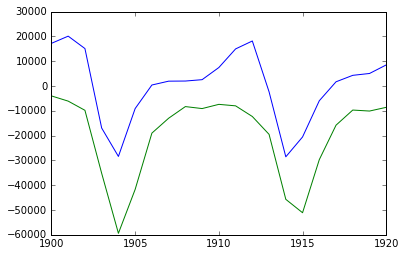

In [15]:
plt.plot(year, hare_grad, year, -lynxes)

![pic](exercise0.png)

In [16]:
import numpy as np
def f(a, b, c):
    return a**b - c

a, b, c = np.ogrid[0:1:24j, 0:1:12j, 0:1:6j] #注意：ogrid[0:30:20]是指间隔为20，ogrid[0:30:20j]是指取20个数
samples = f(a, b, c)
integral = samples.mean()
integral

0.1888423460296792

In [17]:
np.log(2) - 0.5

0.19314718055994529

In [18]:
np.ogrid[0:30:20]

array([ 0, 20])

In [19]:
np.ogrid[0:30:20j]

array([  0.        ,   1.57894737,   3.15789474,   4.73684211,
         6.31578947,   7.89473684,   9.47368421,  11.05263158,
        12.63157895,  14.21052632,  15.78947368,  17.36842105,
        18.94736842,  20.52631579,  22.10526316,  23.68421053,
        25.26315789,  26.84210526,  28.42105263,  30.        ])